### NN - Part 1
### Abed Tabbalat

In [1]:
# Mounting drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment06')
!pwd

Mounted at /content/drive
/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment06


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from keras import layers, models
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical

## Importing Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Data Prep

In [4]:
# print the shape of the data sets
print(f'train_images: {train_images.shape}')
print(f'test_images: {test_images.shape}')
print(f'train_labels: {train_labels.shape}')
print(f'test_labels: {test_labels.shape}')

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)
train_labels: (60000,)
test_labels: (10000,)


Text(0.5, 1.0, '5')

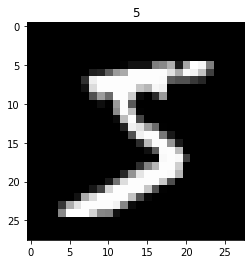

In [5]:
# plot the first image in the training set
plt.imshow(train_images[0], cmap = 'gray')
plt.title(train_labels[0])

In [6]:
# reshape datasets
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# normalize datasets
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert labels to numeric
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# split training set into training and validation sets
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Model

In [7]:
# Instantiate a convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

# Add a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Train the model using a portion of the training data and validate on a validation set
# Store the training history in a variable called `history`
history = model.fit(
    partial_x_train,  # The input features for the training data
    partial_y_train,  # The corresponding target labels for the training data
    epochs=5,         # The number of times to iterate over the entire training dataset
    batch_size=64,    # The number of samples per batch for each update of the model weights
    validation_data=(x_val, y_val)  # The data to use for validation during training
)

Epoch 1/5
782/782 [==============================] - 36s 44ms/step - loss: 0.2111 - accuracy: 0.9338 - val_loss: 0.0712 - val_accuracy: 0.9791
Epoch 2/5
782/782 [==============================] - 38s 49ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 3/5
782/782 [==============================] - 36s 45ms/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.0452 - val_accuracy: 0.9867
Epoch 4/5
782/782 [==============================] - 36s 46ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 5/5
782/782 [==============================] - 38s 49ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0381 - val_accuracy: 0.9900


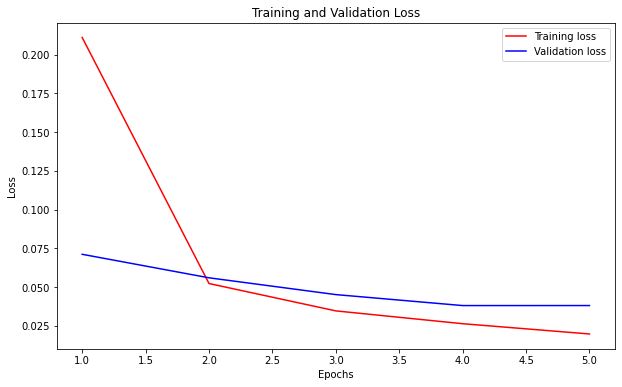

In [12]:
# Extract the history data from the model training
history_dict = history.history

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Get the loss values for both training and validation data
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Generate the x-axis values for the plot
epochs = range(1, len(loss_values) + 1)

# Plot the training and validation loss values against the epoch number
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

# Set the title and axis labels for the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend to the plot
plt.legend()

# Save the figure to a file in the "results/mnist" directory
fig = plt.gcf()
fig.savefig('results/mnist/train_val_loss.png')

# Display the plot
plt.show()

<Figure size 432x288 with 0 Axes>

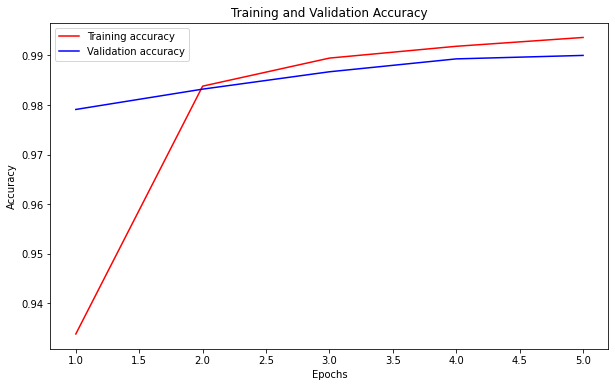

In [13]:
# Clear the current figure to ensure that we're starting with a clean slate
plt.clf()

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Get the accuracy values for both training and validation data
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# Generate the x-axis values for the plot
epochs = range(1, len(loss_values) + 1)

# Plot the training and validation accuracy values against the epoch number
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')

# Set the title and axis labels for the plot
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend to the plot
plt.legend()

# Save the figure to a file in the "results/mnist" directory
fig = plt.gcf()
fig.savefig('results/mnist/train_val_accuracy.png')

# Display the plot
plt.show()

In [14]:
# Evaluate the model on the test data and store the test loss and accuracy in two separate variables
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0301 - accuracy: 0.9889


In [15]:
# Print the test accuracy as a percentage rounded to one decimal place
print(f'Test accuracy: {test_acc * 100:.1f}%')

# Print the test loss rounded to three decimal places
print(f'Test loss: {test_loss:.3f}')

Test accuracy: 98.9%
Test loss: 0.030


In [16]:
# Save the trained model and training history to a file in the "results/mnist" directory
model.save('results/mnist/mnist.h5', history)

# Save the test accuracy, test loss, and training history dictionary to a pickled file in the "results/mnist" directory
pickle.dump({
    'test_accuracy': test_acc,   # The accuracy of the model on the test data
    'test_loss': test_loss,      # The loss of the model on the test data
    'history_dict': history_dict # The history data of the model training
}, open("results/mnist/training_metrics", "wb"))